In [1]:
import igraph
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
import sys
import time

from scipy.odr import ODR, Model, Data, RealData

%load_ext autoreload
%autoreload 1

%aimport graph_functions

In [113]:
%matplotlib inline
# %matplotlib qt5

# plt.style.use('default')
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
        "font.size":11,
    })

save_plots=False

In [115]:
N = 1_000_000
p = 1.2
m = 2

g = igraph.Graph.Barabasi(N, m)
g = max(g.decompose(), key=igraph.Graph.vcount)

degree_array = np.array(g.degree())

In [116]:
z_predicted = np.average(degree_array**2) / np.average(degree_array) - 1

In [117]:
n_len_list = []
rnd_node_list = []
for k in range(7):
    n_len = []
    random_node = np.random.randint(0,g.vcount())
    rnd_node_list.append(random_node)
    for i in range(20):
        n_len.append(len(g.neighborhood(vertices=random_node, order=i)))
    n_len_list.append(n_len)
# -1 or no?

In [118]:
z_vals_list = []
for ns in n_len_list:
    z_vals = []
    for i in range(1,len(ns)):
        nl = ns[i]
        z = nl ** (1/i)
        z_vals.append(ns[i] ** (1/i))
        # print(nl,z)
    z_vals_list.append(z_vals)

In [119]:
z_predicted

9.783935175902762

In [120]:
g.ecount()/g.vcount()

1.999997

In [121]:
# plt.plot([-1,len(z_vals)+1],[0,0], c='black', linewidth=1)

# for zs, rnd_node in zip(z_vals_list, rnd_node_list):
#     plt.plot(range(len(zs)),zs - z_predicted, linewidth=1)
#     plt.scatter(range(len(zs)),zs - z_predicted, s=20, label=f'node: {rnd_node}')

# plt.title(f"$z_M-z_p$ vs $l$ (Erdos-Renyi N={g.vcount()}, $z_p$={z_predicted:.3g})") # l is number of steps form initial nod
# plt.xlabel("$l$")
# plt.xlim((-0.5,len(z_vals_list[0])))
# # plt.ylim((-np.amax(z_vals_list)-0.5, np.amax(z_vals_list)+0.5))
# plt.ylabel('$z$')
# plt.legend()

# if save_plots:
#     plt.savefig(f'real_plots/z_calculation_diff_{int(time.time())}.png')    

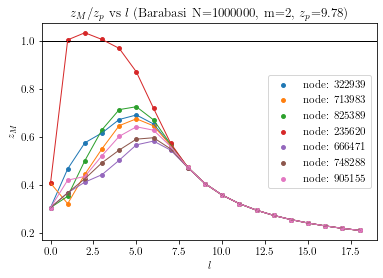

In [124]:
plt.plot([-1,len(z_vals)+1],[1,1], c='black', linewidth=1)

for zs, rnd_node in zip(z_vals_list, rnd_node_list):
    plt.plot(range(len(zs)),zs / z_predicted, linewidth=1)
    plt.scatter(range(len(zs)),zs / z_predicted, s=15, label=f'node: {rnd_node}')

plt.title(f"$z_M/z_p$ vs $l$ (Barabasi N={g.vcount()}, m={m}, $z_p$={z_predicted:.3g})") # l is number of steps form initial nod
plt.xlabel("$l$")
plt.xlim((-0.5,len(z_vals_list[0])))
# plt.ylim((-np.amax(z_vals_list)-0.5, np.amax(z_vals_list)+0.5))
plt.ylabel('$z_M$')
plt.legend()

if save_plots:
    plt.savefig(f'real_plots/z_calculation_frac_{int(time.time())}.png')      